In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv('data/airbnb_listing_train.csv')
df_train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [3]:
df_test = pd.read_csv('data/airbnb_listing_validate.csv')
df_test.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12297872,"Great apartment, super location",44144487,Azarakhsh,NaN,De Baarsjes - Oud-West,52.37326,4.86213,Entire home/apt,2,49,15-09-2019,0.99,1,267


In [4]:
df_train.shape

(12901, 16)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [21]:
#Drop neighbourhood_group column since it has no values

In [7]:
df_train.drop('neighbourhood_group',axis=1,inplace=True)

In [8]:
df_train.name.describe()

count         12879
unique        12653
top       Amsterdam
freq             28
Name: name, dtype: object

In [9]:
bool_series = pd.notnull(df_train["name"])
df_train[bool_series].name

0                      Luxury home 100m2+garden in center!
1                              East is where your home is!
2          Amsterdam Central - LUXURY house in BUSY STREET
3                               great appartment down town
4            Private room with canal view in peaceful area
                               ...                        
12896    Quiet stylish private room 15 mins to city  ce...
12897    Beautiful, spacious apt. with great views @ IJ...
12898                  Great apartment de Pijp/Albert Cuyp
12899             Stylish apartment in an amazing location
12900                     Amsterdam Apartments First Floor
Name: name, Length: 12879, dtype: object

In [10]:
a = df_train[bool_series].groupby(['name']).size().sort_values(ascending=False).reset_index(name='count').head(10)
a

,name,count
0,Amsterdam,28
1,Spacious apartment near Vondelpark,6
2,Lovely apartment in Amsterdam,5
3,Spacious apartment in Amsterdam,5
4,Cosy apartment in the city centre of Amsterdam,4
5,Cosy apartment near city center,4
6,Amsterdam Appartement,4
7,Canal View Apartment,4
8,Quality stay in an AUTHENTIC FARMHOUSE near Am...,4
9,Spacious apartment with garden,4


<AxesSubplot:xlabel='count', ylabel='name'>

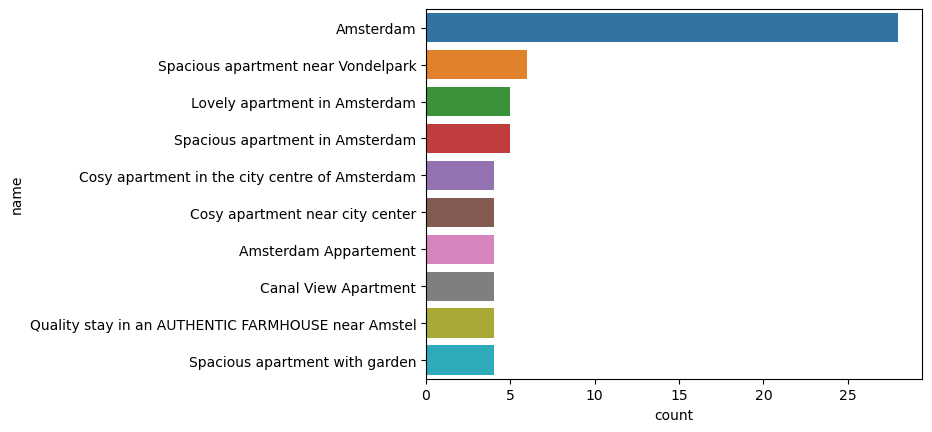

In [11]:
sns.barplot(x='count',y='name',data=a)

In [13]:
df_train.host_name.describe()

count       12893
unique       4536
top       Martijn
freq           76
Name: host_name, dtype: object

In [14]:
bool_ser1 = pd.notnull(df_train["host_name"])
b = df_train[bool_ser1].groupby(['host_name']).size().sort_values(ascending=False).reset_index(name='count').head(10)
b

,host_name,count
0,Martijn,76
1,Anne,58
2,Thomas,53
3,Tim,51
4,Marieke,51
5,Paul,51
6,Bas,51
7,Michiel,51
8,Wendy And Bram,49
9,Jasper,49


<AxesSubplot:xlabel='count', ylabel='host_name'>

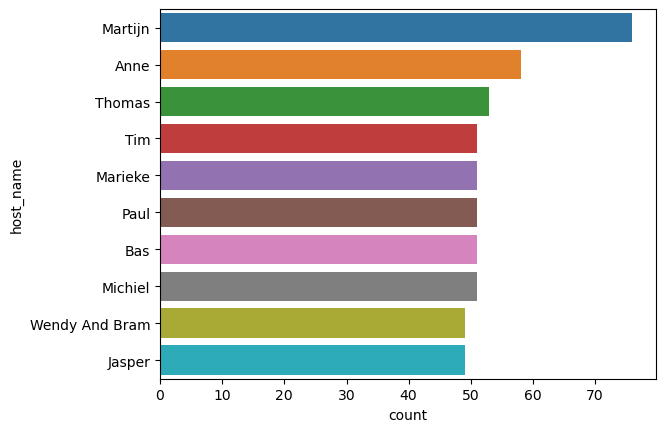

In [15]:
sns.barplot(x='count',y='host_name',data=b)

In [16]:
df_train.neighbourhood.describe()

count                      12901
unique                        22
top       De Baarsjes - Oud-West
freq                        2209
Name: neighbourhood, dtype: object

In [17]:
df_train.groupby(['neighbourhood']).size().sort_values(ascending=False).reset_index(name='count')

,neighbourhood,count
0,De Baarsjes - Oud-West,2209
1,De Pijp - Rivierenbuurt,1600
2,Centrum-West,1429
3,Centrum-Oost,1097
4,Westerpark,958
5,Zuid,924
6,Oud-Oost,831
7,Bos en Lommer,730
8,Oostelijk Havengebied - Indische Buurt,644
9,Watergraafsmeer,381


In [18]:
df_train.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [19]:
c = df_train.groupby(['room_type']).size().sort_values(ascending=False).reset_index(name='count')
c

,room_type,count
0,Entire home/apt,10064
1,Private room,2622
2,Hotel room,174
3,Shared room,41


<AxesSubplot:xlabel='count', ylabel='room_type'>

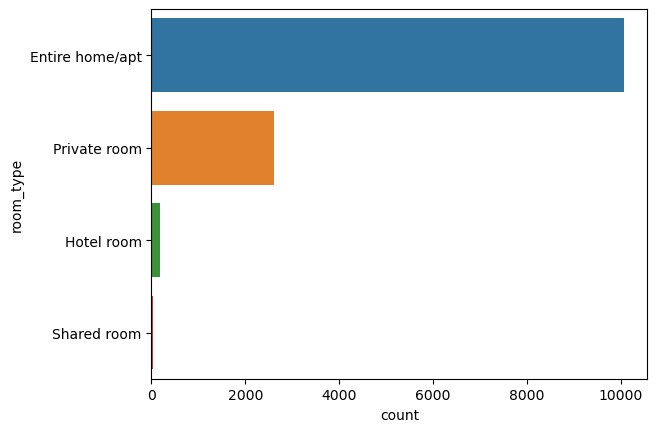

In [20]:
sns.barplot(x='count',y='room_type',data=c)

In [21]:
df_train.minimum_nights.describe()

count    12901.000000
mean         3.542516
std         15.154077
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max       1001.000000
Name: minimum_nights, dtype: float64

In [22]:
df_train.number_of_reviews.describe()

count    12901.000000
mean        24.803194
std         53.406134
min          0.000000
25%          2.000000
50%          9.000000
75%         24.000000
max        843.000000
Name: number_of_reviews, dtype: float64

In [23]:
df_train.last_review.describe()

count          11305
unique          1495
top       08-03-2020
freq             269
Name: last_review, dtype: object

In [24]:
df_train.reviews_per_month.describe()

count    11305.000000
mean         0.748501
std          1.260791
min          0.010000
25%          0.180000
50%          0.380000
75%          0.770000
max         50.000000
Name: reviews_per_month, dtype: float64

In [25]:
#Obs:
# There are 12653 unique airbnb apartments/rooms. maximum are in Amsterdam
# Martijn has hosted 76 times which is the max
# Widely selected neighbourhood by Airbnb customers is De Baarsjes-Oud-West
# Most Customers prefer/book entire house rather than shared room
# Min booking for alteast 1 day and Max booking is for 1001 days 

In [26]:
##To see the costliest rental with their price
df_train[['name','host_name','price']].sort_values(by='price',ascending=False).head(10)

,name,host_name,price
12839,"Center, Large&Sunny Room,Pvt Bathrm",David,9000
6023,Moie kamer in Amsterdam,Mery,7550
10029,"Hotel Estheréa, Classic Room",Hotel Estheréa,7000
12885,"Hotel Estheréa, Deluxe Room",Hotel Estheréa,7000
1657,"Hotel Estheréa, Triple Room",Hotel Estheréa,7000
770,"Hotel Estheréa, Deluxe Canal View Room",Hotel Estheréa,7000
8589,"Luxury Suites Amsterdam, Luxury Suite",Luxury Suites,6477
7206,"Luxury Suites Amsterdam, Royal Suite",Luxury Suites,6477
12090,"Luxury Suites Amsterdam, Luxury Suite Patio",Luxury Suites,6477
3289,Beautiful Modern Apartment With Stunning View,Wendy And Bram,5555


In [27]:
##By the above observation we can see that most expensive is 9000 located in Bathrm

# EDA

<AxesSubplot:>

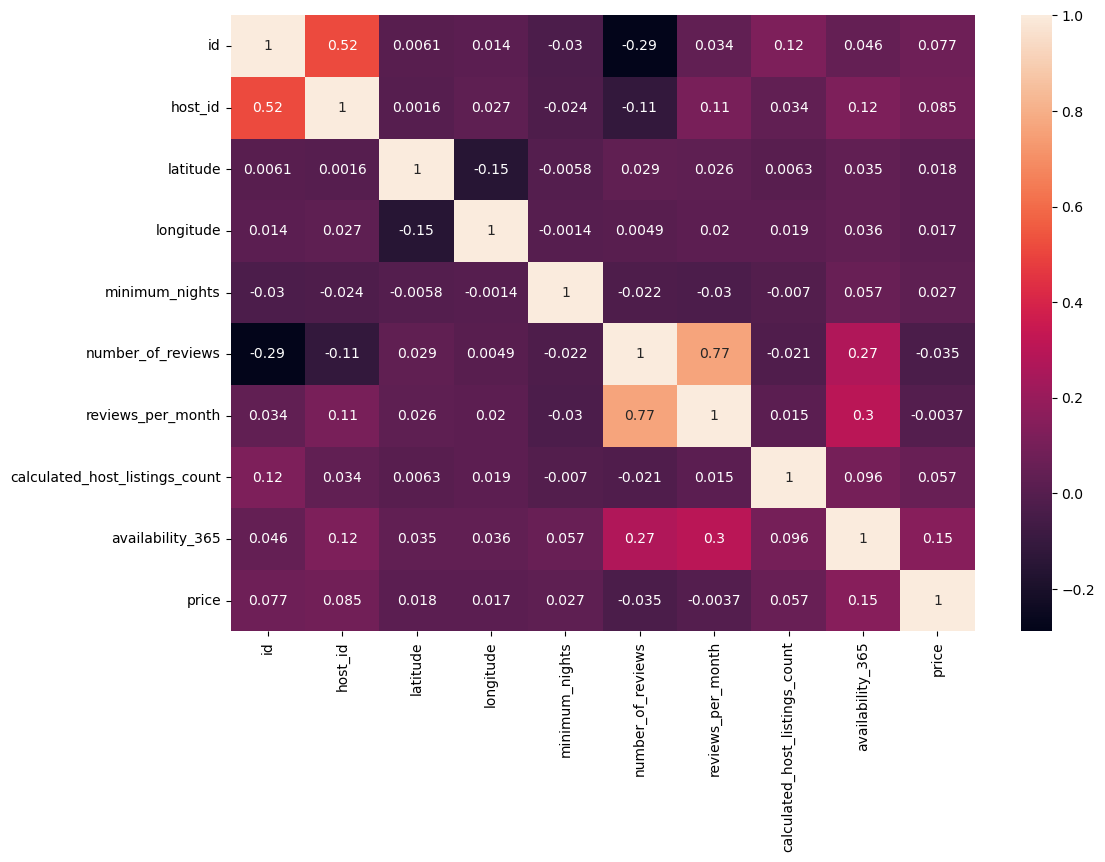

In [28]:
##Try to find corelation b/w Attributes 
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot=True)

In [30]:
df_train.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
dtype: object

In [32]:
df_train.isna().sum()

id                                   0
name                                22
host_id                              0
host_name                            8
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       1596
reviews_per_month                 1596
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

In [36]:
df_train['last_review']=pd.to_datetime(df_train['last_review'])

In [35]:
df_train['name'].fillna(df_train['name'].mode()[0], inplace=True)
df_train['host_name'].fillna(df_train['host_name'].mode()[0],inplace=True)
df_train['last_review'].fillna(df_train['last_review'].mean(),inplace=True)
df_train['reviews_per_month'].fillna(df_train['reviews_per_month'].mean(),inplace=True)

In [37]:
df_train["day"] = df_train['last_review'].map(lambda x: x.day)
df_train["month"] = df_train['last_review'].map(lambda x: x.month)
df_train["year"] = df_train['last_review'].map(lambda x: x.year)

In [38]:
df_train.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price,day,month,year
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,2020-02-15,0.27,1,0,220,15,2,2020
1,13289321,East is where your home is!,10259430,Ana,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,2019-06-19,0.29,1,0,110,19,6,2019
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,2020-03-16,1.65,1,7,100,16,3,2020
3,7820311,great appartment down town,693472,Ayden,Westerpark,52.37792,4.87300,Entire home/apt,3,42,2020-02-17,0.72,1,0,130,17,2,2020
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,Westerpark,52.38051,4.87493,Private room,2,89,2020-02-26,4.02,1,24,90,26,2,2020


In [90]:
##Processing Categorical Columns

In [39]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()

In [40]:
df_train['name']=LabelEncoder().fit_transform(df_train['name'])
df_train['host_name']=LabelEncoder().fit_transform(df_train['host_name'])
df_train['neighbourhood']=LabelEncoder().fit_transform(df_train['neighbourhood'])
df_train['room_type']=LabelEncoder().fit_transform(df_train['room_type'])

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

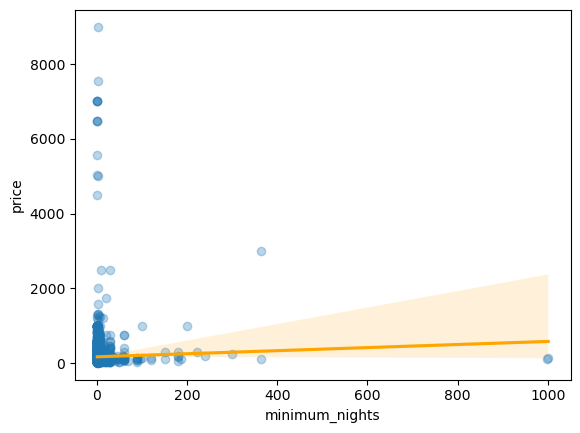

In [93]:
sns.regplot(x='minimum_nights',y='price',data=df_train,scatter_kws={'alpha':0.3},line_kws={'color':'orange'})

<AxesSubplot:xlabel='room_type', ylabel='price'>

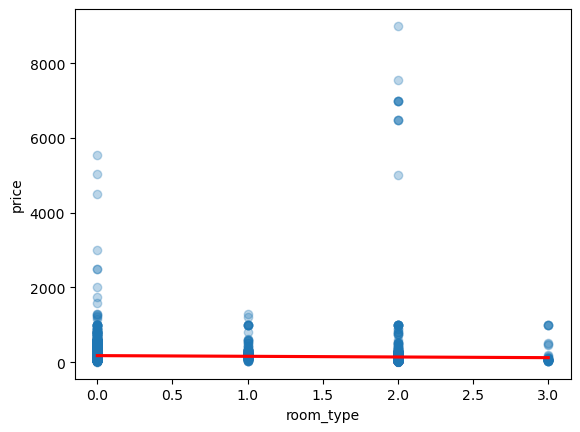

In [95]:
sns.regplot(x='room_type',y='price',data=df_train,scatter_kws={'alpha':0.3},line_kws={'color':'red'})

In [78]:
df_train.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price,day,month,year
0,11602914,7657,3123809,2856,8,52.35368,4.90177,0,3,13,2020-02-15,0.27,1,0,220,15,2,2020
1,13289321,5031,10259430,180,17,52.35728,4.92052,0,4,14,2019-06-19,0.29,1,0,110,19,6,2019
2,40779315,752,224969266,2863,5,52.37582,4.89850,0,2,9,2020-03-16,1.65,1,7,100,16,3,2020
3,7820311,12437,693472,403,20,52.37792,4.87300,0,3,42,2020-02-17,0.72,1,0,130,17,2,2020
4,27346603,9258,41888346,128,20,52.38051,4.87493,2,2,89,2020-02-26,4.02,1,24,90,26,2,2020


## Train_Test_split

In [43]:
from sklearn.model_selection import train_test_split

In [79]:
X=df_train.drop(columns=['price','last_review'],axis=1)
y=df_train['price']

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=20)

In [81]:
X_train.shape

(9675, 16)

In [82]:
y_train.shape

(9675,)

In [83]:
def dfdetails(df):
    
    count_null = df.isnull().sum()
    df_stats = pd.DataFrame(index = df.columns, data =
                           {'datatype': df.dtypes,
                            'unique_values': df.nunique(),
                            'have_null': df.isnull().any(),
                            'Number of null values' : count_null})
    return df_stats

In [73]:
dfdetails(df_train)

,datatype,unique_values,have_null,Number of null values
id,int64,12901,False,0
name,int32,12653,False,0
host_id,int64,11601,False,0
host_name,int32,4536,False,0
neighbourhood,int32,22,False,0
latitude,float64,5227,False,0
longitude,float64,7887,False,0
room_type,int32,4,False,0
minimum_nights,int64,56,False,0
number_of_reviews,int64,362,False,0


In [84]:
scaler =StandardScaler()

In [85]:
X_scaler=scaler.fit_transform(X)

In [86]:
X_scaler

array([[-0.67804227,  0.37095518, -0.75017994, ...,  0.10092034,
        -1.08916715,  1.01384487],
       [-0.53937964, -0.34673097, -0.66110163, ...,  0.552524  ,
         0.08498275,  0.19570434],
       [ 1.72094943, -1.51618226,  2.01925201, ...,  0.21382126,
        -0.79562967,  1.01384487],
       ...,
       [-0.5484971 , -0.17646499, -0.21030607, ..., -0.46358423,
         0.37852023, -0.62243619],
       [ 0.17386485,  1.33242506, -0.72805807, ...,  1.56863223,
        -0.5020922 ,  0.19570434],
       [ 1.14102566, -1.52520116,  1.75075058, ...,  0.32672217,
        -1.08916715,  1.01384487]])

In [77]:
dfdetails(X)

,datatype,unique_values,have_null,Number of null values
name,int32,12653,False,0
host_name,int32,4536,False,0
neighbourhood,int32,22,False,0
latitude,float64,5227,False,0
longitude,float64,7887,False,0
room_type,int32,4,False,0
minimum_nights,int64,56,False,0
number_of_reviews,int64,362,False,0
reviews_per_month,float64,611,False,0
calculated_host_listings_count,int64,26,False,0


In [ ]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [88]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)

In [89]:
model=reg.fit(X_train,y_train)

C:\Users\nithin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.2984e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [90]:
pred=model.predict(X_test)

In [91]:
pred_train=model.predict(X_train)

In [93]:
from sklearn.metrics import r2_score,mean_squared_error
import math

In [94]:
mse_train=mean_squared_error(y_train,pred_train)
rmse_train=math.sqrt(mse_train)
print(rmse_train)

248.02420619312286


In [96]:
mse = mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

161.86971736312623
